In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier


In [2]:
df = pd.read_csv('dataset.csv')
# Filter
df = df.loc[~df['Activity'].isin(['LIE_TO_STAND', 'STAND_TO_LIE'])]

X = df.drop(columns=['Activity'])
y = df['Activity']

# balanced_accuracy = (recall + specificity) / 2
metrics = ['f1_weighted', 'balanced_accuracy', 'accuracy']

## KNN

In [3]:
knn_results = []

# KNN classifiers with odd K in range of (1,19)
# search for best K
for i in range(10):
    k = i*2+1
    knnClass = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    result = cross_validate(knnClass, X, y, cv=10, scoring=metrics,
                            return_train_score=True, n_jobs=-1)
    knn_results.append(result)
    print("k = " + str(k) + ":")

    print("\tf1:")
    print("\t\tmean = {mean:.2f}%;\n\t\tstd = {std:.2f};"
        .format(mean = result.get('test_f1_weighted').mean()*100,
                std = result.get('test_f1_weighted').std()))

    print("\tbalanced accuracy:")
    print("\t\tmean = {mean:.2f}%;\n\t\tstd = {std:.2f};"
        .format(mean = result.get('test_balanced_accuracy').mean()*100,
                std = result.get('test_balanced_accuracy').std()))

    print("\taccuracy:")
    print("\t\tmean = {mean:.2f}%;\n\t\tstd = {std:.2f};"
          .format(mean = result.get('test_accuracy').mean()*100,
                  std = result.get('test_accuracy').std()))

# spoiler it's: 9

k = 1:
	f1:
		mean = 89.24%;
		std = 0.02;
	balanced accuracy:
		mean = 89.32%;
		std = 0.02;
	accuracy:
		mean = 89.28%;
		std = 0.02;
k = 3:
	f1:
		mean = 90.80%;
		std = 0.01;
	balanced accuracy:
		mean = 90.69%;
		std = 0.01;
	accuracy:
		mean = 90.85%;
		std = 0.01;
k = 5:
	f1:
		mean = 91.13%;
		std = 0.02;
	balanced accuracy:
		mean = 90.83%;
		std = 0.02;
	accuracy:
		mean = 91.16%;
		std = 0.02;
k = 7:
	f1:
		mean = 91.21%;
		std = 0.02;
	balanced accuracy:
		mean = 91.55%;
		std = 0.01;
	accuracy:
		mean = 91.25%;
		std = 0.02;
k = 9:
	f1:
		mean = 91.47%;
		std = 0.02;
	balanced accuracy:
		mean = 91.36%;
		std = 0.02;
	accuracy:
		mean = 91.50%;
		std = 0.02;
k = 11:
	f1:
		mean = 91.17%;
		std = 0.02;
	balanced accuracy:
		mean = 90.44%;
		std = 0.03;
	accuracy:
		mean = 91.21%;
		std = 0.02;
k = 13:
	f1:
		mean = 91.19%;
		std = 0.02;
	balanced accuracy:
		mean = 89.50%;
		std = 0.03;
	accuracy:
		mean = 91.24%;
		std = 0.02;
k = 15:
	f1:
		mean = 91.11%;
		std = 0.02;
	b

## KNN report

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, train_size=0.7, random_state=42)
knn = KNeighborsClassifier(n_neighbors=9, n_jobs=-1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

                    precision    recall  f1-score   support

            LAYING       0.99      1.00      1.00       587
        LIE_TO_SIT       0.93      0.96      0.94        26
           SITTING       0.88      0.86      0.87       540
        SIT_TO_LIE       0.94      0.91      0.92        32
      SIT_TO_STAND       0.88      0.70      0.78        10
          STANDING       0.89      0.90      0.89       594
      STAND_TO_SIT       0.73      0.76      0.74        21
           WALKING       0.99      1.00      1.00       517
WALKING_DOWNSTAIRS       1.00      0.99      1.00       422
  WALKING_UPSTAIRS       0.99      1.00      0.99       463

          accuracy                           0.95      3212
         macro avg       0.92      0.91      0.91      3212
      weighted avg       0.95      0.95      0.95      3212



## Decision Tree

In [5]:
tree_results = []

# Search for the best tree depth
for i in range(1, 17):
    curr = DecisionTreeClassifier(random_state=42, max_depth=i)
    result = cross_validate(curr, X, y, cv=10, scoring=metrics,
                            return_train_score=True, n_jobs=-1)
    tree_results.append(result)
    print("Depth = " + str(i) + ":")

    print("\tf1:")
    print("\t\tmean = {mean:.2f}%;\n\t\tstd = {std:.2f};"
        .format(mean = result.get('test_f1_weighted').mean()*100,
                std = result.get('test_f1_weighted').std()))

    print("\tbalanced accuracy:")
    print("\t\tmean = {mean:.2f}%;\n\t\tstd = {std:.2f};"
        .format(mean = result.get('test_balanced_accuracy').mean()*100,
                std = result.get('test_balanced_accuracy').std()))

    print("\taccuracy:")
    print("\t\tmean = {mean:.2f}%;\n\t\tstd = {std:.2f};"
          .format(mean = result.get('test_accuracy').mean()*100,
                  std = result.get('test_accuracy').std()))

# spoiler it's: 9

Depth = 1:
	f1:
		mean = 24.78%;
		std = 0.00;
	balanced accuracy:
		mean = 19.94%;
		std = 0.00;
	accuracy:
		mean = 36.67%;
		std = 0.00;
Depth = 2:
	f1:
		mean = 39.61%;
		std = 0.00;
	balanced accuracy:
		mean = 34.47%;
		std = 0.02;
	accuracy:
		mean = 53.07%;
		std = 0.00;
Depth = 3:
	f1:
		mean = 69.47%;
		std = 0.04;
	balanced accuracy:
		mean = 49.43%;
		std = 0.04;
	accuracy:
		mean = 74.96%;
		std = 0.04;
Depth = 4:
	f1:
		mean = 82.24%;
		std = 0.03;
	balanced accuracy:
		mean = 55.34%;
		std = 0.03;
	accuracy:
		mean = 83.18%;
		std = 0.03;
Depth = 5:
	f1:
		mean = 82.96%;
		std = 0.04;
	balanced accuracy:
		mean = 59.56%;
		std = 0.06;
	accuracy:
		mean = 83.64%;
		std = 0.04;
Depth = 6:
	f1:
		mean = 84.54%;
		std = 0.04;
	balanced accuracy:
		mean = 67.23%;
		std = 0.04;
	accuracy:
		mean = 84.84%;
		std = 0.04;
Depth = 7:
	f1:
		mean = 86.68%;
		std = 0.03;
	balanced accuracy:
		mean = 74.74%;
		std = 0.04;
	accuracy:
		mean = 86.79%;
		std = 0.03;
Depth = 8:
	f1:
		me

## Decision Tree Report

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, train_size=0.7, random_state=42)
dtree = DecisionTreeClassifier(random_state=42, max_depth=9)
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

                    precision    recall  f1-score   support

            LAYING       0.99      1.00      1.00       587
        LIE_TO_SIT       0.96      0.88      0.92        26
           SITTING       0.90      0.87      0.88       540
        SIT_TO_LIE       0.78      0.78      0.78        32
      SIT_TO_STAND       0.50      0.40      0.44        10
          STANDING       0.89      0.91      0.90       594
      STAND_TO_SIT       0.46      0.76      0.57        21
           WALKING       0.94      0.94      0.94       517
WALKING_DOWNSTAIRS       0.92      0.92      0.92       422
  WALKING_UPSTAIRS       0.91      0.90      0.90       463

          accuracy                           0.92      3212
         macro avg       0.83      0.84      0.83      3212
      weighted avg       0.92      0.92      0.92      3212



## MLP

In [7]:
for i in range(1,11):
    mpl = MLPClassifier(activation = 'logistic',
                    solver='adam',
                    alpha=1e-5,
                    learning_rate = 'invscaling',
                    max_iter = 500,
                    hidden_layer_sizes=(i*50,),
                    random_state=42)

    result = cross_validate(mpl, X, y, cv=10, scoring=metrics,
                            return_train_score=True, n_jobs=-1)
    print("Hidden Layers = " + str(mpl.hidden_layer_sizes[0]) + ":")

    print("\tf1:")
    print("\t\tmean = {mean:.2f}%;\n\t\tstd = {std:.2f};"
        .format(mean = result.get('test_f1_weighted').mean()*100,
                std = result.get('test_f1_weighted').std()))

    print("\tbalanced accuracy:")
    print("\t\tmean = {mean:.2f}%;\n\t\tstd = {std:.2f};"
        .format(mean = result.get('test_balanced_accuracy').mean()*100,
                std = result.get('test_balanced_accuracy').std()))

    print("\taccuracy:")
    print("\t\tmean = {mean:.2f}%;\n\t\tstd = {std:.2f};"
          .format(mean = result.get('test_accuracy').mean()*100,
                  std = result.get('test_accuracy').std()))

# best hidden layer size: 100

Hidden Layers = 50:
	f1:
		mean = 96.29%;
		std = 0.02;
	balanced accuracy:
		mean = 95.45%;
		std = 0.02;
	accuracy:
		mean = 96.31%;
		std = 0.02;
Hidden Layers = 100:
	f1:
		mean = 96.37%;
		std = 0.02;
	balanced accuracy:
		mean = 95.99%;
		std = 0.02;
	accuracy:
		mean = 96.39%;
		std = 0.02;
Hidden Layers = 150:
	f1:
		mean = 96.28%;
		std = 0.02;
	balanced accuracy:
		mean = 95.89%;
		std = 0.02;
	accuracy:
		mean = 96.30%;
		std = 0.02;
Hidden Layers = 200:
	f1:
		mean = 96.17%;
		std = 0.02;
	balanced accuracy:
		mean = 95.55%;
		std = 0.02;
	accuracy:
		mean = 96.20%;
		std = 0.02;
Hidden Layers = 250:
	f1:
		mean = 96.02%;
		std = 0.02;
	balanced accuracy:
		mean = 95.68%;
		std = 0.02;
	accuracy:
		mean = 96.05%;
		std = 0.02;
Hidden Layers = 300:
	f1:
		mean = 96.08%;
		std = 0.02;
	balanced accuracy:
		mean = 96.04%;
		std = 0.02;
	accuracy:
		mean = 96.10%;
		std = 0.02;
Hidden Layers = 350:
	f1:
		mean = 96.11%;
		std = 0.02;
	balanced accuracy:
		mean = 95.51%;
		std =

## MLP Report

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, train_size=0.7, random_state=42)
mlp = MLPClassifier(activation = 'logistic',
                    solver='adam',
                    alpha=1e-5,
                    learning_rate = 'invscaling',
                    max_iter = 500,
                    hidden_layer_sizes=(100,),
                    random_state=42)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       587
        LIE_TO_SIT       1.00      1.00      1.00        26
           SITTING       0.97      0.95      0.96       540
        SIT_TO_LIE       0.97      1.00      0.98        32
      SIT_TO_STAND       0.91      1.00      0.95        10
          STANDING       0.97      0.98      0.97       594
      STAND_TO_SIT       0.89      0.81      0.85        21
           WALKING       1.00      1.00      1.00       517
WALKING_DOWNSTAIRS       1.00      1.00      1.00       422
  WALKING_UPSTAIRS       1.00      1.00      1.00       463

          accuracy                           0.99      3212
         macro avg       0.97      0.97      0.97      3212
      weighted avg       0.99      0.99      0.99      3212



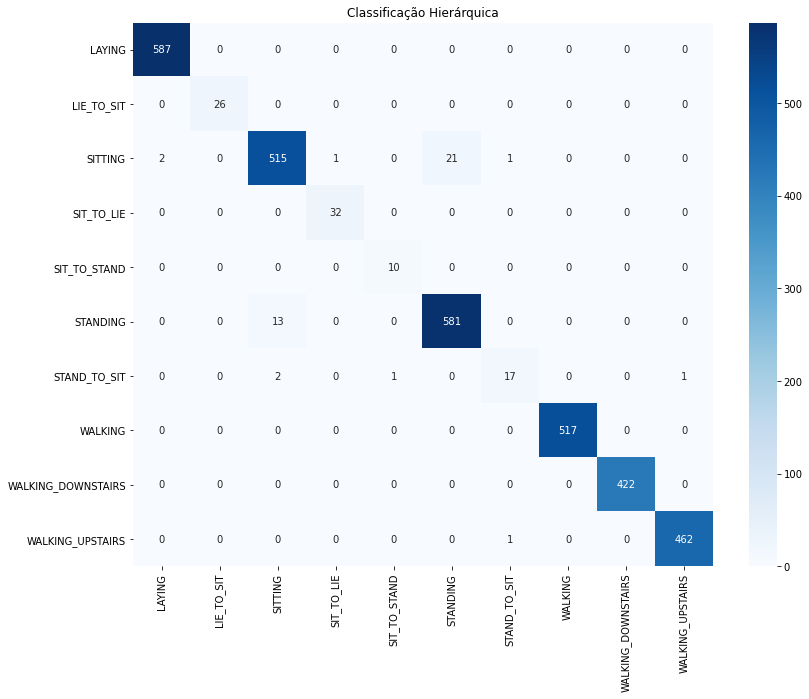

In [4]:
cf_matrix = confusion_matrix(y_test, y_pred)

categories = np.unique(y).tolist()
plt.figure(figsize=(13,10))
plt.title('Classificação Hierárquica')
sns.heatmap(cf_matrix, annot=True, fmt="", cmap='Blues', cbar=True, xticklabels=categories, yticklabels=categories)
